# 7.1　使用mplot3d绘制3D图表

## 7.1.1　mplot3d概述

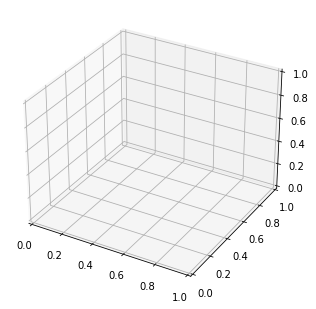

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

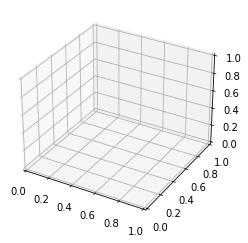

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

## 7.1.2　绘制常见的3D图表

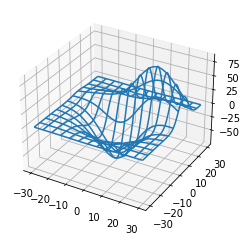

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# 获取测试数据
X, Y, Z = axes3d.get_test_data(0.05)
# 绘制 3D线框图
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
plt.show()

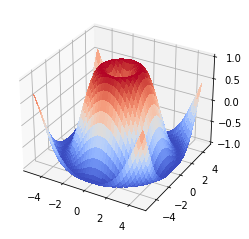

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
x1 = np.arange(-5, 5, 0.25)
y1 = np.arange(-5, 5, 0.25)
x1, y1 = np.meshgrid(x1, y1)
r1 = np.sqrt(x1** 2 + y1 ** 2)
z1 = np.sin(r1)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# 绘制曲面图
ax.plot_surface(x1, y1, z1, cmap=cm.coolwarm, linewidth=0, antialiased=False) 
# 设置 z 轴刻度的范围、位置、格式
ax.set_zlim(-1.01, 1.01)
plt.show()

## 7.1.3　实例1：三维空间的星星

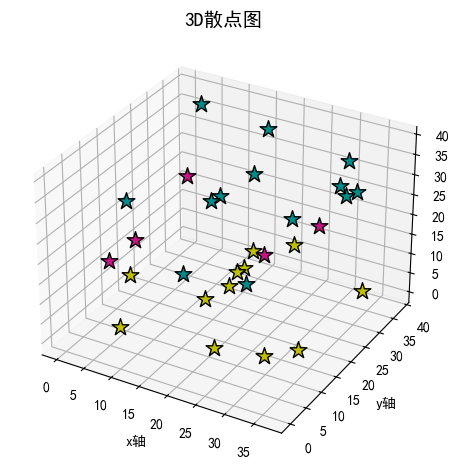

In [1]:
# 01_stars_in_3d
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
# 生成测试数据
x = np.random.randint(0, 40, 30)
y = np.random.randint(0, 40, 30)
z = np.random.randint(0, 40, 30)
# 创建三维坐标系的绘图区域, 并在该区域中绘制3D散点图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for xx, yy, zz in zip(x, y, z):
    color = 'y'
    if 10 < zz < 20:
        color = '#C71585'
    elif zz >= 20:
        color = '#008B8B'
    ax.scatter(xx, yy, zz, c=color, marker='*', s=160, linewidth=1, edgecolor='black')
ax.set_xlabel('x轴')
ax.set_ylabel('y轴')
ax.set_zlabel('z轴')
ax.set_title('3D散点图', fontproperties='simhei', fontsize=14)
plt.tight_layout()
plt.show()

# 7.2　使用animation制作动图

## 7.2.1　animation概述

In [8]:
# 以qt5为图形界面后端
%matplotlib qt5
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation    # 导入动画类
x = np.arange(0, 2 *np.pi, 0.01)
fig, ax = plt.subplots()
line, = ax.plot(x, np.sin(x))
# 定义每帧动画调用的函数 
def animate(i):
    line.set_ydata(np.sin(x + i / 10.0))
    return line
# 定义初始化帧的函数
def init():
    line.set_ydata(np.sin(x))
    return line
ani = FuncAnimation(fig=fig, func=animate, frames=100, 
                    init_func=init, interval=20, blit=False)
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import ArtistAnimation
x = np.arange(0, 2 * np.pi, 0.01)
fig, ax = plt.subplots()
arr = []
for i in range(5):
    line = ax.plot(x, np.sin(x + i))
    arr.append(line)
# 根据arr存储的一组图形创建动画
ani = ArtistAnimation(fig=fig, artists=arr, repeat=True)
plt.show()

## 7.2.2　实例2：三维空间闪烁的星星

C:\Windows\Temp\ipykernel_9376\2007121657.py:27: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(fig=fig, func=animate, frames=None, init_func =init, interval=1000, blit=False)
D:\miniconda\envs\datavis\Lib\site-packages\matplotlib\animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


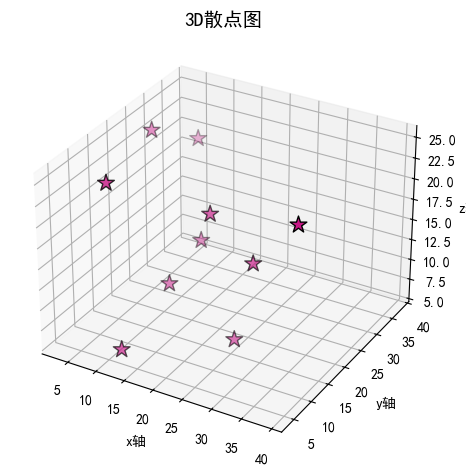

In [10]:
# 02_twinkling_stars_in_3d
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
# 生成测试数据
xx = np.array([13, 5, 25, 13, 9, 19, 3, 39, 13, 27])
yy = np.array([4, 38, 16, 26, 7, 19, 28, 10, 17, 18])
zz = np.array([7, 19, 6, 12, 25, 19, 23, 25, 10, 15])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# 绘制初始的3D散点图
star = ax.scatter(xx, yy, zz, c='#C71585', marker='*', s=160, 
      linewidth=1, edgecolor='black')
# 每帧动画调用的函数
def animate(i):
    if i % 2:
        color = '#C71585'
    else:
        color = 'white'
    next_star = ax.scatter(xx, yy, zz, c=color, marker='*', s = 160, linewidth=1, edgecolor='black')
    return next_star
def init():
    return star
ani = FuncAnimation(fig=fig, func=animate, frames=None, init_func =init, interval=1000, blit=False)
ax.set_xlabel('x轴')
ax.set_ylabel('y轴')
ax.set_zlabel('z轴')
ax.set_title('3D散点图', fontproperties='simhei', fontsize=14)
plt.tight_layout()
plt.show()

# 7.3　使用basemap绘制统计地图

## 7.3.2　实例3：美国部分城镇人口分布

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\admin\\Desktop\\2014_us_cities.csv'

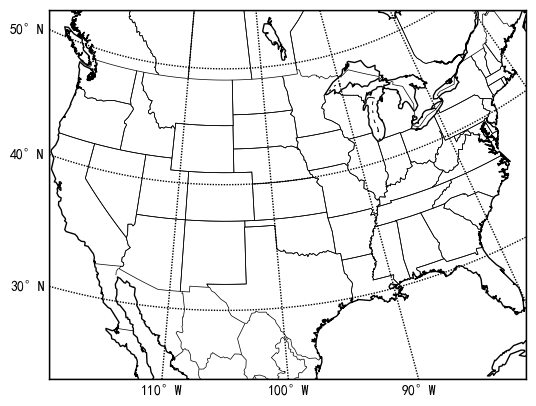

In [9]:
# 03_twinkling_stars_in_3d
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
# 创建 Basemap 对象
map = Basemap(projection='stere',lat_0=90,lon_0=-105,llcrnrlat=23.41, 
              urcrnrlat=45.44,llcrnrlon=-118.67,urcrnrlon=-64.52, 
              rsphere=6371200.,resolution='l',area_thresh=10000)
map.drawmapboundary()     # 绘制地图投影周围边界
map.drawstates()          # 绘制州界
map.drawcoastlines()      # 绘制海岸线
map.drawcountries()       # 绘制国家边界
# 绘制纬线
parallels = np.arange(0., 90, 10.)
map.drawparallels(parallels, labels=[1, 0, 0, 0], fontsize=10)
# 绘制经线
meridians = np.arange(-110., -60., 10.)
map.drawmeridians(meridians, labels=[0, 0, 0, 1], fontsize=10)
posi = pd.read_csv(r"C:\Users\admin\Desktop\2014_us_cities.csv")
# 从3228组城市数据中选择500 组数据
lat = np.array(posi["lat"][0:500])               # 获取纬度值
lon = np.array(posi["lon"][0:500])               # 获取经度值
pop = np.array(posi["pop"][0:500], dtype=float)  # 获取人口数
# 气泡图的气泡大小
size = (pop / np.max(pop)) * 1000 
x, y = map(lon, lat)
map.scatter(x, y, s=size)
plt.title('2014年美国部分城镇的人口分布情况')
plt.show()